In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
filename = 'module_5_auto.csv'
response = requests.get(url)

if response.status_code == 200:
    filename = 'module_5_auto.csv' 
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f"File downloaded successfully as '{filename}'")
else:
    print(f"Error downloading the file. Status code:{response.status_code}")

File downloaded successfully as 'module_5_auto.csv'


In [6]:
df = pd.read_csv("module_5_auto.csv", header=0)

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [8]:
#to only use numeric data:
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [9]:
#to remove the columns 'Unnamed:0.1' and 'Unnamed:0' since they do not provide any value to the models:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

#to look at updated dataframe:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


<h2>Functions For Plotting</h2>

In [10]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height =10
    plt.figure(figsize=(width, height))

    ax1=sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2=sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [11]:
#training data, testing data, linear regression object, polynomial transformation object:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height =10
    plt.figure(figsize=(width, height))

    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [12]:
#to place the target data price in a separate dtaframe y_data:
y_data = df['price']

In [13]:
#to drop price data in dataframe x_data:
x_data=df.drop('price',axis=1)

In [14]:
#to randomly split data into training and testing data using the function train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("Number of test samples: ", x_test.shape[0])
print("Number of training samples: ",x_train.shape[0])

Number of test samples:  21
Number of training samples:  180


In [15]:
#use train_test_split to split up the dataset to 40% for testing, param_random_state=0
x_train1, x_test1, y_train1, y_test1=train_test_split(x_data, y_data, test_size=0.40, random_state=0)

print("Number of test samples: ", x_test1.shape[0])
print("Number of training samples: ",x_train1.shape[0])

Number of test samples:  81
Number of training samples:  120


In [16]:
#import LinearRegression
from sklearn.linear_model import LinearRegression

In [17]:
#to create a Linear Regression object:
lre=LinearRegression()

In [18]:
#to fit the model using the feature "horsepower":
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [19]:
#calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

In [20]:
#calculate the R^2 on the training data:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

In [21]:
#calculate the R^2 on the test data of size 0.40
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

<h2>Cross-Validation Score</h2>
Cross-validation score is to be used when there is no sufficient testing data.

In [22]:
#import cross_val_score from model_selection:
from sklearn.model_selection import cross_val_score

In [23]:
#the feature:horsepower, the target data: y_data, the parameter:cv -- determines the number of folds
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [24]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [25]:
#calculate the average and standard deviation of estimate:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is", Rcross.std())

The mean of the folds are 0.5220099150421194 and the standard deviation is 0.2911839444756025


In [26]:
#use negative squared error as a score:
-1 * cross_val_score(lre,x_data[['horsepower']],y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247589])

In [27]:
#calculate the average R^2 using two folds and calculate the average of estimate:
Rcross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross1.mean()

0.5166761697127429

In [28]:
#use cross_val_predict to predict the output
from sklearn.model_selection import cross_val_predict

In [29]:
#the feature: horsepower, the target data y_data, parameter cv
yhat=cross_val_predict(lre,x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Overfitting, Underfitting and Model Selection
#### Linear regression
#### Polynomial regression

Create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [30]:
lr = LinearRegression()
lr.fit(x_train[['horsepower','curb-weight','engine-size','highway-mpg']], y_train)

LinearRegression()

In [31]:
#Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [32]:
#Prediction using testing data:
yhat_test = lr.predict(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Perform some model evalutaion using the training and testing data separately.

In [33]:
#Import the seaborn and matplotlib library for plotting.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

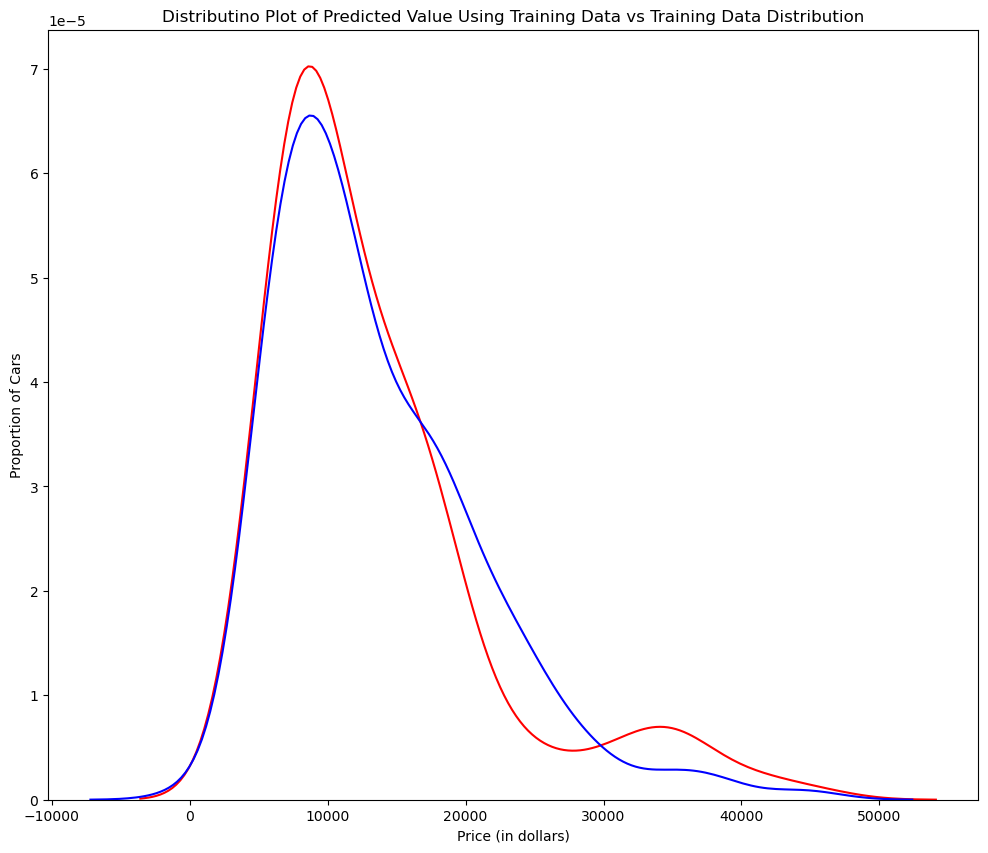

In [34]:
#Examine the distribution of the predicted values of the training data.
Title = 'Distributino Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

This is a figure of the plot of predicted values using the training data (red) compared to the actual values of the training data (blue).

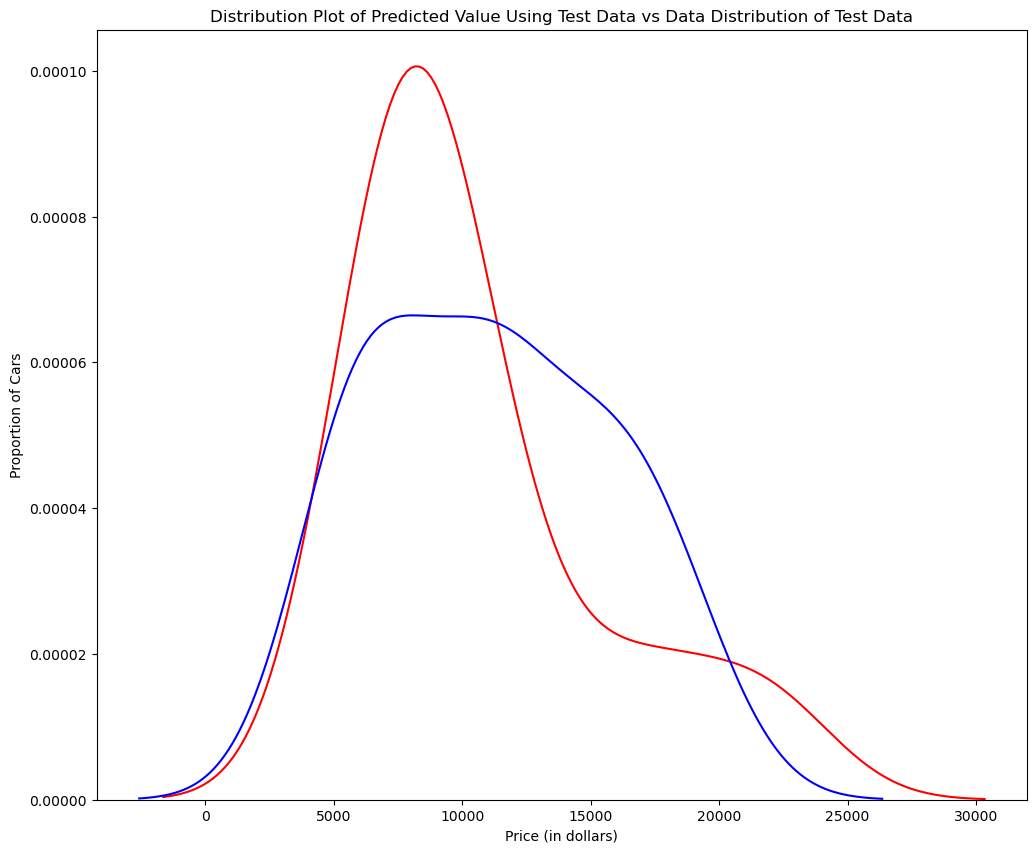

In [35]:
#Examine the distribution of the predicted values of the testing data:
Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test, "Actural Values (Test)", "Predicted Values (Test)", Title)

<h3>Underfitting</h3>

The figure shows the plot of predicted value using the test data (red) compared to the actual values of the test data(blue).

Comparing two figures, it is evident that the distribution of the test data is better at fitting the data. In the second figure, between the range of 5000 to 15000, the shape of the distribution misses too many points.

In [36]:
#Apply polynomial regression to check if there is a drop of prediction accuracy between the data.
from sklearn.preprocessing import PolynomialFeatures

In [37]:
#Use 55% of the data for training and the rest for testing:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.45,random_state=0)

In [38]:
#Perform a degree 5 polynomial transformation on the feature 'horsepower'
pr = PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [39]:
#Create a Linear Regression model "poly" and train it:
poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression()

In [40]:
#Use the method "predict" to see the output of the model.
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.73877623,  7308.06173582, 12213.81078747, 18893.1290908 ,
       19995.81407813])

In [41]:
#Take the first five predicted values and compare it to the actual targets:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.73877623  7308.06173582 12213.81078747 18893.1290908 ]
True values: [ 6295. 10698. 13860. 13499.]


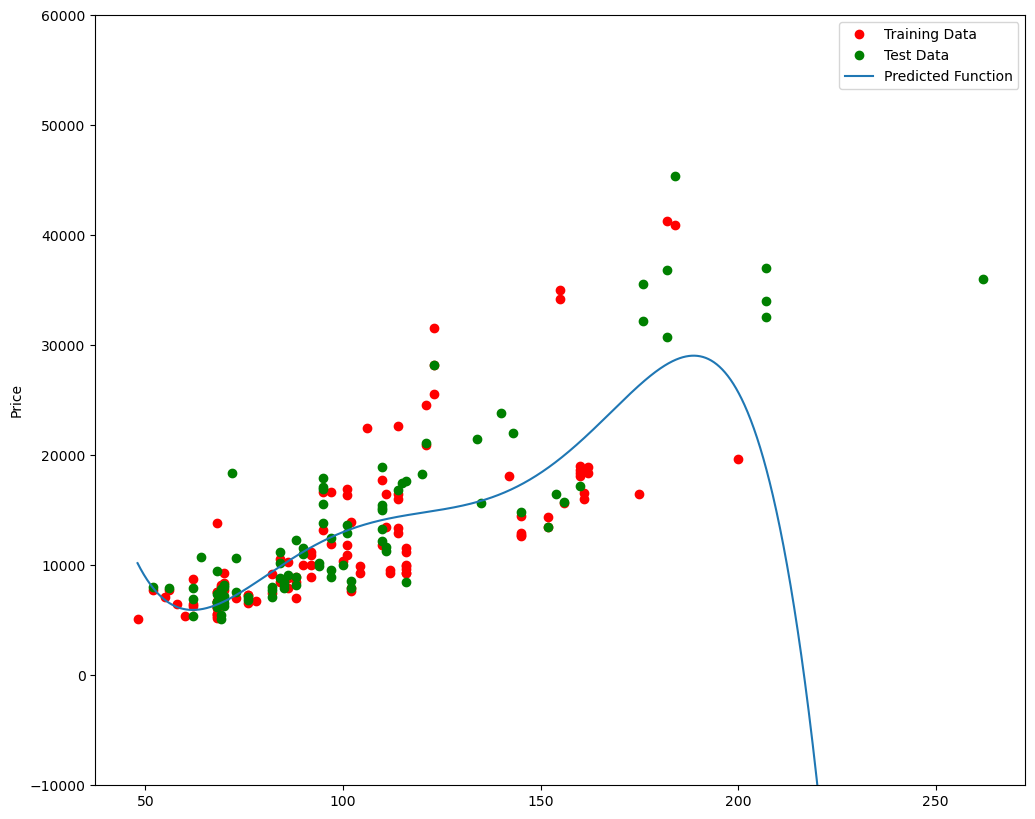

In [42]:
#Use the defined function "PollyPlot" to display the training data, testing data, and the predicted function:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

<h3>Overfitting</h3>

In this polynomial regression model, red dots represents training data, green dots represent test data, and the blue line represents the model prediction.

The model start to fit the noise instead of the underlying process from around 200 horsepower, meaning that the model will not perform well at this point.

In [43]:
#R^2 of the training data:
poly.score(x_train_pr, y_train)

0.5567716902028981

In [44]:
#R^2 of the testing data:
poly.score(x_test_pr, y_test)

-29.871621329672777

Since the lower the R^2, the worse the model, that R^2 of the testing data being negative is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2')

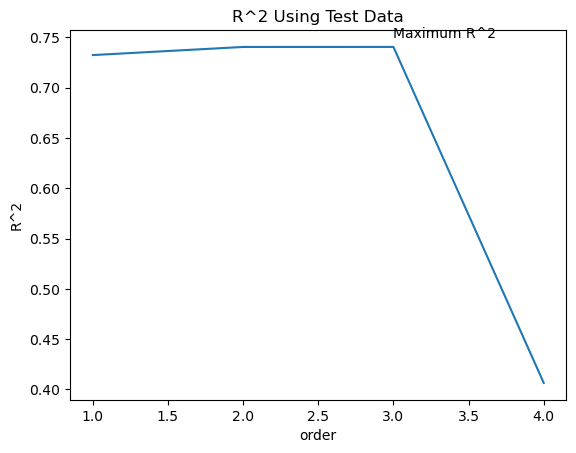

In [45]:
#Check R^2 results on the test data for different order polynomials and then plot the results:
Rsqu_test = []

order = [1,2,3,4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')

The figure shows that R^2 gradually increase until the order reaches 3. Then the R^2 dramatically drops at the order 4.

In [46]:
#!pip install ipywidgets

In [47]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [48]:
#Define a function and test out different polynomial orders and different amounts of data:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=test_data,random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

In [49]:
interact(f,order=(0,6,1),test_data=(0.05,0.95,0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [50]:
#Create a PolynomialFeatures object pr1 of degree two:
pr1 = PolynomialFeatures(degree=2)

In [53]:
#Use fit_transform to transform the training and testing samples
#for the features 'horsepower','curb-weight','engine-size','highway-mpg'
x_train_pr1=pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

In [54]:
#Use the attribute "shape" to check how many dimensions the new feature have:
x_train_pr1.shape

(110, 15)

In [55]:
#Create a linear regression model "poly1".
#Train the object using the polynomial features method "fit":
poly1=LinearRegression()
poly1.fit(x_train_pr1, y_train)

#poly1=LinearRegression().fit(x_train_pr1,y_train)

LinearRegression()

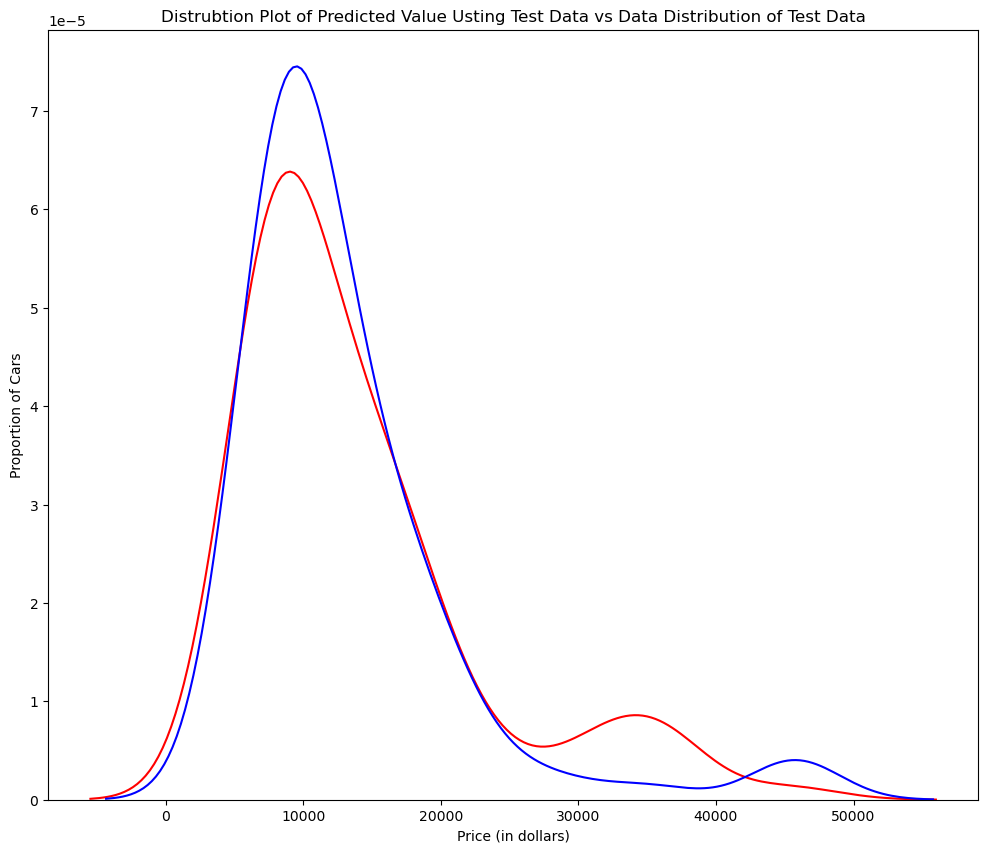

In [57]:
#Use the method "predict" to predict an output on the polynomial features.
#Then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data:
yhat_test1 = poly1.predict(x_test_pr1)

Title='Distrubtion Plot of Predicted Value Usting Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

The predicted prices are less accurate than the actual prices at the range of around 10000, and 30000-40000. At price of 10000, the predicted price (blue) is higher than the actual price(red), whereas between $30000-40000 the predicted price is lower.

### Ridge Regression

We will see how the parameter alpha changes sthe model.

Our test data will be used as validation data.

In [58]:
#Perform a degree two polynomial transformation on the data:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower','curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower','curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [60]:
#Import Ridge from the module linear models:
from sklearn.linear_model import Ridge

In [61]:
#Create a Ridge regression object, setting the regularization parameter (alpha) to 0.1:
RigeModel=Ridge(alpha=1)

In [62]:
RigeModel.fit(x_train_pr,y_train)

Ridge(alpha=1)

In [63]:
#Obtain a prediction:
yhat=RigeModel.predict(x_test_pr)

In [64]:
#Compare the first five predicted samples to the test set:
print('predicted:', yhat[0:4])
print('test set:', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set: [ 6295. 10698. 13860. 13499.]


In [66]:
#Use a for loop to select the value of alpha that minimizes the test error
#And create a progress bar to see how many iterations we have completed so far:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:03<00:00, 264.19it/s, Test Score=0.564, Train Score=0.859]


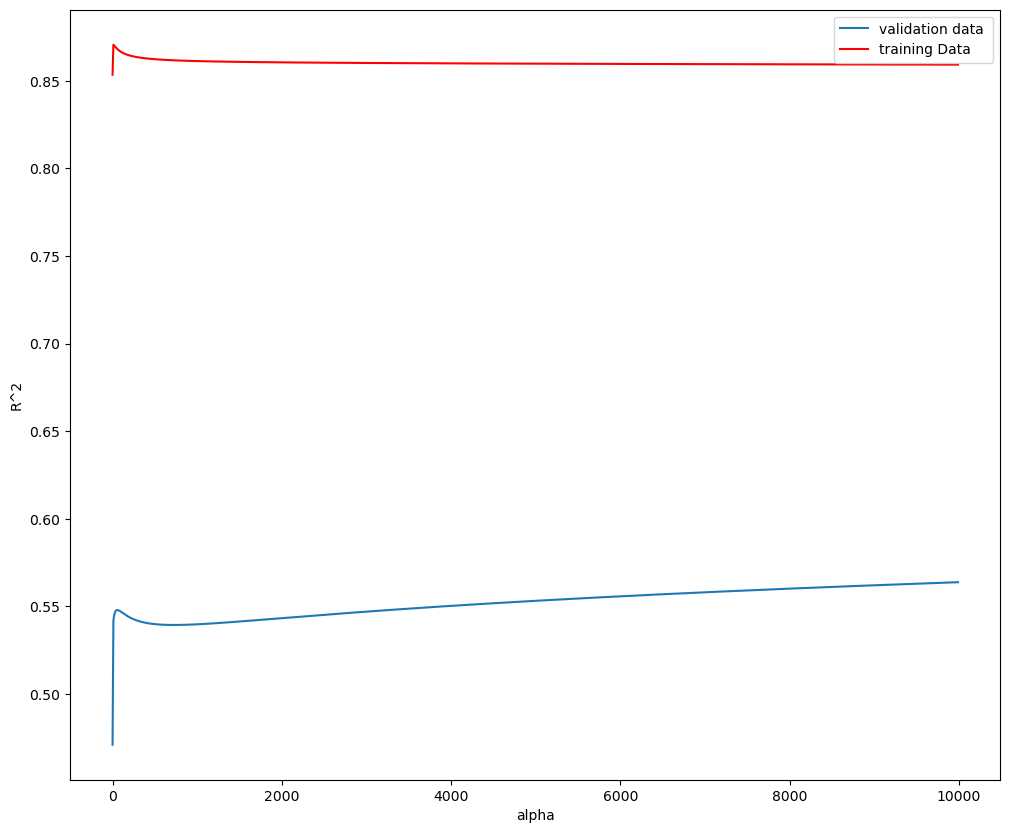

In [67]:
#Plot out the value of R^2 for different alphas:
width = 12
height =10
plt.figure(figsize=(width,height))

plt.plot(Alpha,Rsqu_test,label='validation data ')
plt.plot(Alpha,Rsqu_train,'r',label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The blue line represents the R^2 of the validation data, and the red line training data. The x-axis represents the different values of alpha.

As alpha increases, the R^2 of training data decreases. This means that as alpha increases, the model performs worse on the training data.

For validation data, the R^2 increases with alpha and converges at a point.

In [68]:
#Perform Ridge regression:
#Calculate the R^2 using the polynomial features,
#Use the training data to train the model and use the test data to test the model
#The parameter alpha should be set to 10:

RigeModel1=Ridge(alpha=10)
RigeModel1.fit(x_train_pr, y_train)
RigeModel1.score(x_test_pr, y_test)

0.5418576440207072

# Grid Search

The term alpha is a hyperparameter.

Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [69]:
#Import GridSearchCV from the module model_selection:
from sklearn.model_selection import GridSearchCV

In [70]:
#Create a dictionary of parameter values:
parameters1=[{'alpha': [0.001,0.1,1,10,100,1000,10000,100000,1000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

In [72]:
#Create a Ridge regression object:
RR=Ridge()
RR

Ridge()

In [73]:
#Create a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [74]:
#Fit the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

The object finds the best parameter values on the validation data.

We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [75]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [76]:
#Test the model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

In [77]:
#Perform a grid search for the alpha parameter and the normalization parameter
#Then find the best values of the parameters:
parameters2=[{'alpha': [0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]}]

Grid2 = GridSearchCV(Ridge(),parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha = best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)

In [90]:
best_ridge_model1 = Ridge(alpha = best_alpha)
best_ridge_model1.fit(x_train_pr, y_train)

Ridge(alpha=10000)

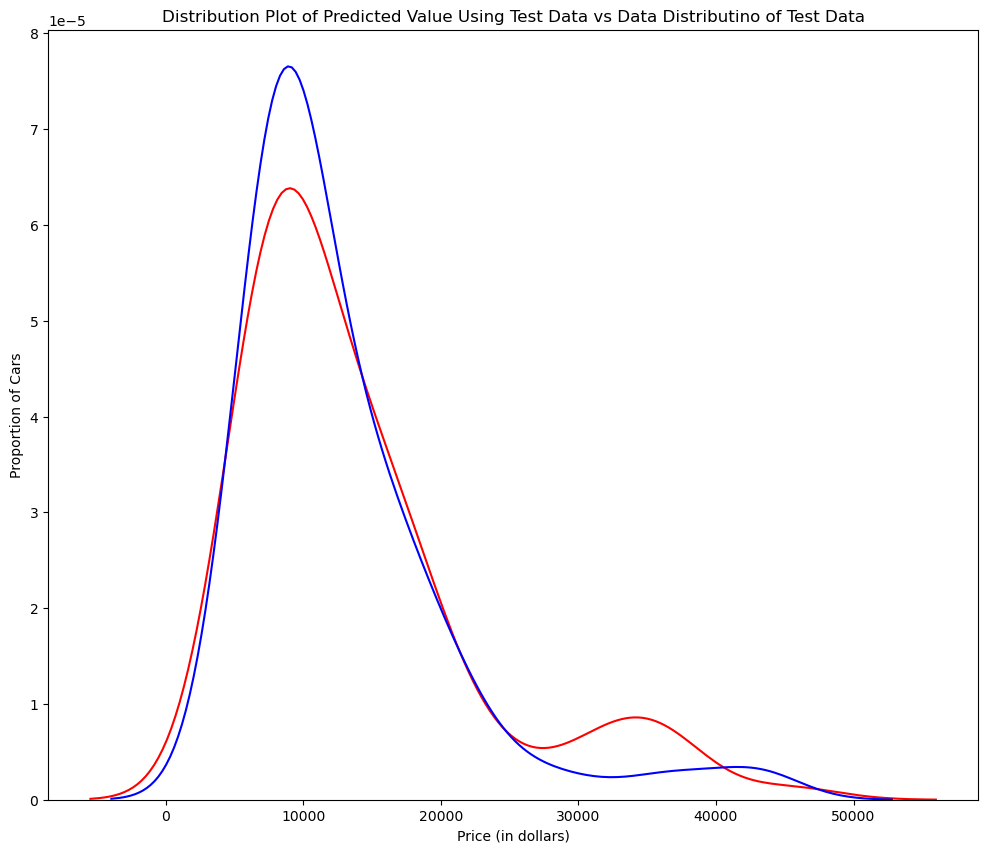

In [91]:
yhat_rige = best_ridge_model1.predict(x_test_pr)

Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distributino of Test Data'

DistributionPlot(y_test, yhat_rige, "Actual Values (Test)", "Predicted Values (Test)", Title)